#Tiff to HDF5 Convert


In [1]:
#관련 라이브러리 설치(코랩에는 깔려있는 듯)
#로컬에서 작업시 파이썬 버전에 맞춰까셈
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#라이브러리 임포트
import cv2
import datetime as dt
import h5py
import numpy as np
import os
import glob
import fnmatch
import matplotlib.pyplot as plt
import PIL

##H5 파일 확인

H5 파일이 어떤식으로 되어있는지 H5 파일을 직접 다운로드 해서 확인해보았다.


In [3]:
#구글 드라이브 임포트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
#h5파일 형식부터 살펴보자
f2 = h5py.File("/content/drive/MyDrive/pic/demo-dataset-real4test.h5", 'r')
print(list(f2.keys()))

['test_gt', 'test_ns']


In [57]:
#각 이미지가 넘파이 형태로 들어가 있는 걸 확인 가능하다
dset1 = f2['test_gt'][:]
print(dset1.shape)
print(dset1)

(16, 1024, 1024)
[[[125 120 123 ... 130 129 124]
  [129 132 124 ... 129 127 119]
  [122 124 127 ... 132 123 121]
  ...
  [124 127 123 ... 118 122 129]
  [125 132 128 ... 124 120 122]
  [130 133 129 ... 125 124 115]]

 [[129 125 128 ... 129 135 125]
  [116 116 121 ... 122 125 124]
  [116 109 106 ... 125 128 121]
  ...
  [127 124 120 ... 116 124 105]
  [117 113 126 ... 121 112 117]
  [116 121 130 ... 121 120 118]]

 [[130 122 124 ... 140 129 128]
  [130 121 125 ... 128 133 134]
  [134 125 127 ... 126 125 121]
  ...
  [122 129 125 ... 137 133 118]
  [119 127 128 ... 135 135 123]
  [127 123 128 ... 130 120 134]]

 ...

 [[119 122 115 ... 122 125 125]
  [117 116 111 ... 114 118 131]
  [125 123 110 ... 117 117 115]
  ...
  [126 120 115 ... 123 118 128]
  [124 119 124 ... 126 124 101]
  [129 122 124 ... 118 110 101]]

 [[123 122 117 ... 124 121 118]
  [125 127 128 ... 126 114 117]
  [127 127 120 ... 112 108 118]
  ...
  [121 122 122 ... 113 123 132]
  [119 123 126 ... 127 123 115]
  [117 123 

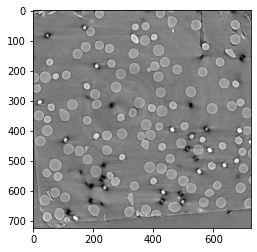

In [52]:
#shape으로 확인해보면 (16, 1024, 1024)으로 되어있다. 앞에 16은 이미지 갯수다.
#1장 뽑아서 확인해보자.
plt.imshow(dset1[1, 200:-100, 200:-100], cmap='gray')

In [53]:
dset1[1, 200:-100, 200:-100].shape

(724, 724)

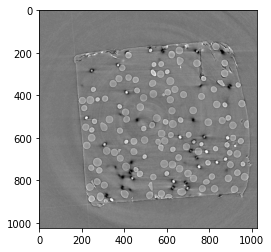

In [54]:
#온전한 크기로 출력하면 이래 나온다.
plt.imshow(dset1[1, :, :], cmap='gray')

-----

##Tif to HDF5 Convert

In [5]:
#이미지 조회하여 배열에 넣기
#절대 경로로 한번에 받기 위하여 glob 사용
input = glob.glob("/content/drive/MyDrive/data/cap/0_filtered/*.tif")
print(len(input))

1760


In [6]:
#잘 들어갔는지 확인
input

['/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0761.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0762.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0763.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0764.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0765.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0766.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0767.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0768.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0769.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0770.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0771.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0772.tif',
 '/content/drive/MyDrive/data/cap/0_filtered/cap0_00147.tif.view0773.tif',
 '/content/drive/MyDrive/

In [7]:
#넘파이 배열을 만들어서 현재 경로의 이미지를 넣어준다.
#100장만 넣어보겠음음
training_images = []

for img in input[:100]:
    an_img = PIL.Image.open(img)
    img_array = np.array(an_img)
    img_resize = cv2.resize(img_array, (32,32))
    training_images.append(img_resize)
  
training_images = np.array(training_images)

print(training_images.shape)

(100, 32, 32)


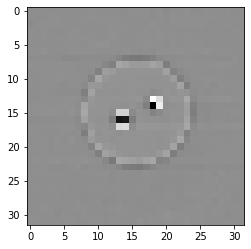

In [8]:
#잘 들어갔는지 확인
plt.imshow(training_images[1, :, :], cmap='gray')

In [9]:
#test.hdf5라는 파일을 생성하고 데이터를 써준다.
f = h5py.File('test.hdf5', 'w')
test_data = f.create_dataset('test', data = training_images)

In [11]:
#확인
f2 = h5py.File('/content/test.hdf5', 'r')
print(list(f2.keys()))

['test']


-----

##결과 확인

In [12]:
dset1 = f2['test'][:]
print(dset1.shape)
print(dset1)

(100, 32, 32)
[[[34418 34390 34263 ... 34574 34507 34438]
  [34412 34425 34430 ... 34523 34441 34475]
  [34419 34519 34436 ... 34532 34469 34424]
  ...
  [34430 34243 34421 ... 34495 34578 34451]
  [34480 34485 34449 ... 34430 34483 34524]
  [34420 34511 34390 ... 34452 34455 34487]]

 [[34451 34454 34428 ... 34527 34399 34463]
  [34415 34398 34377 ... 34483 34474 34482]
  [34236 34471 34562 ... 34506 34430 34375]
  ...
  [34409 34476 34682 ... 34488 34505 34429]
  [34476 34487 34443 ... 34332 34490 34542]
  [34513 34550 34424 ... 34457 34409 34489]]

 [[34469 34455 34466 ... 34517 34464 34484]
  [34402 34437 34461 ... 34509 34468 34589]
  [34674 34629 34513 ... 34588 34504 34331]
  ...
  [34391 34549 34508 ... 34493 34547 34760]
  [34390 34392 34511 ... 34421 34481 34491]
  [34533 34540 34481 ... 34404 34305 34518]]

 ...

 [[34533 34513 34447 ... 34630 34611 34595]
  [34524 34573 34624 ... 34608 34571 34561]
  [34555 34519 34577 ... 34498 34702 34663]
  ...
  [34430 34662 34531 ... 3

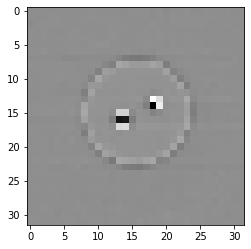

In [13]:
plt.imshow(dset1[1, :, :], cmap='gray')